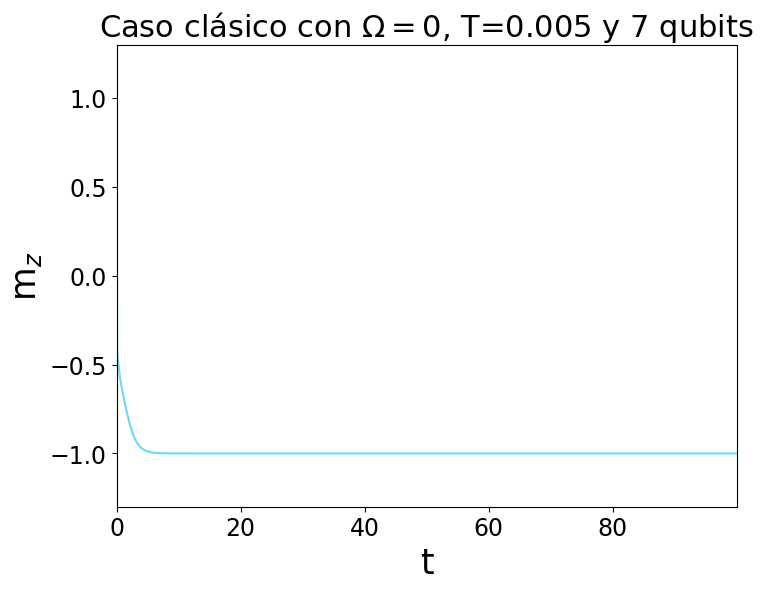

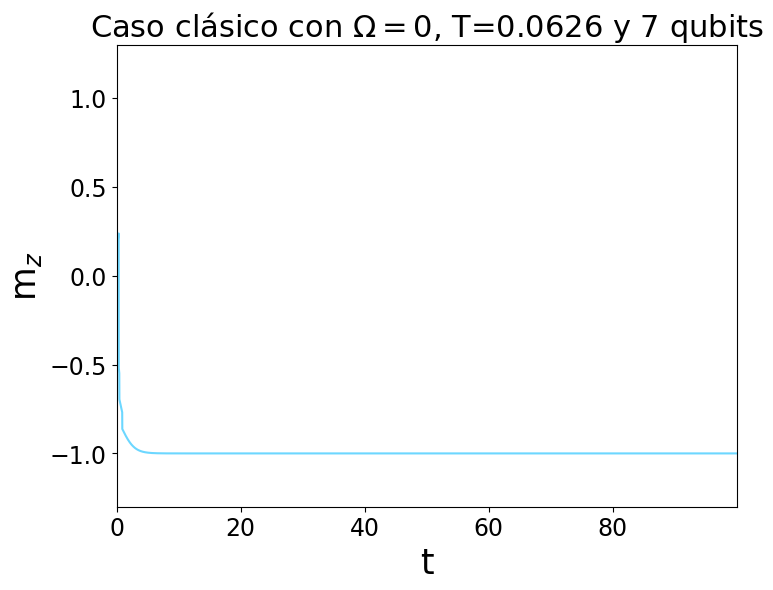

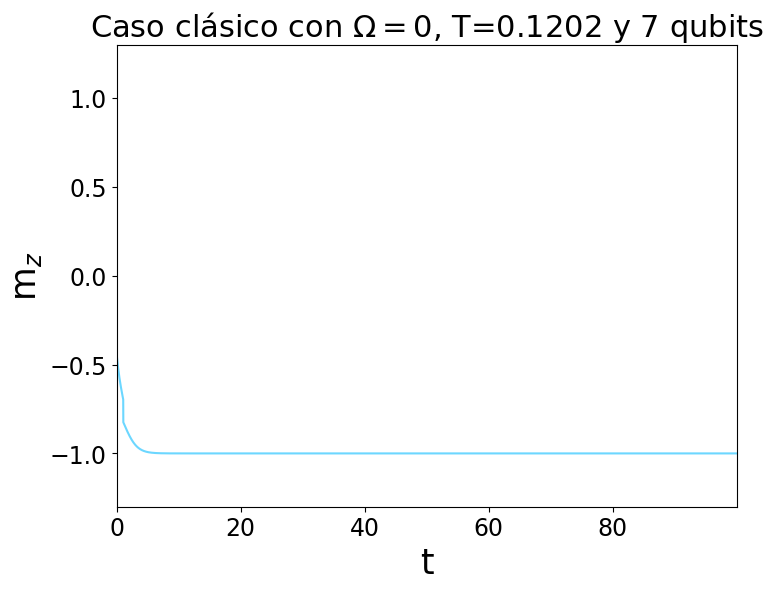

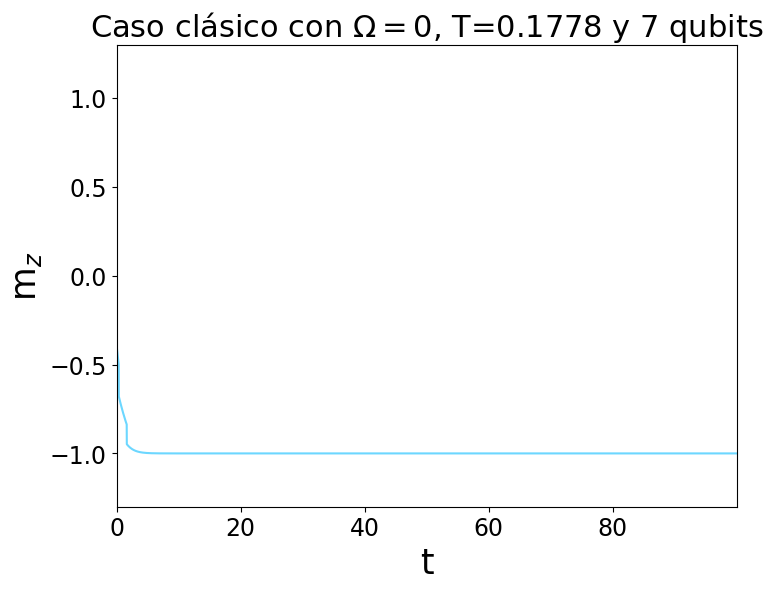

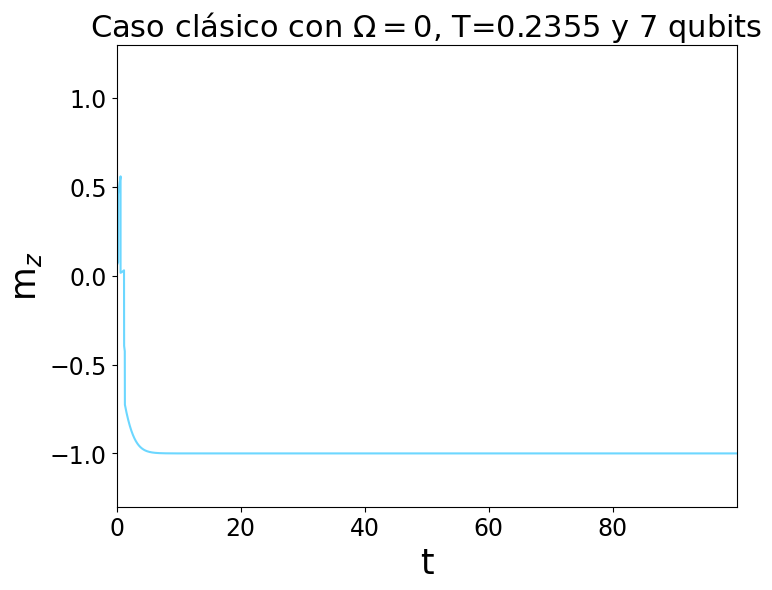

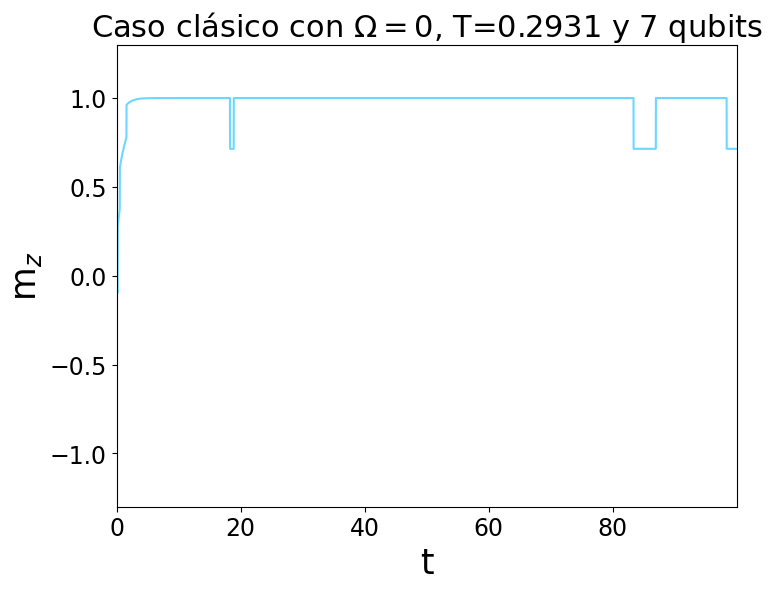

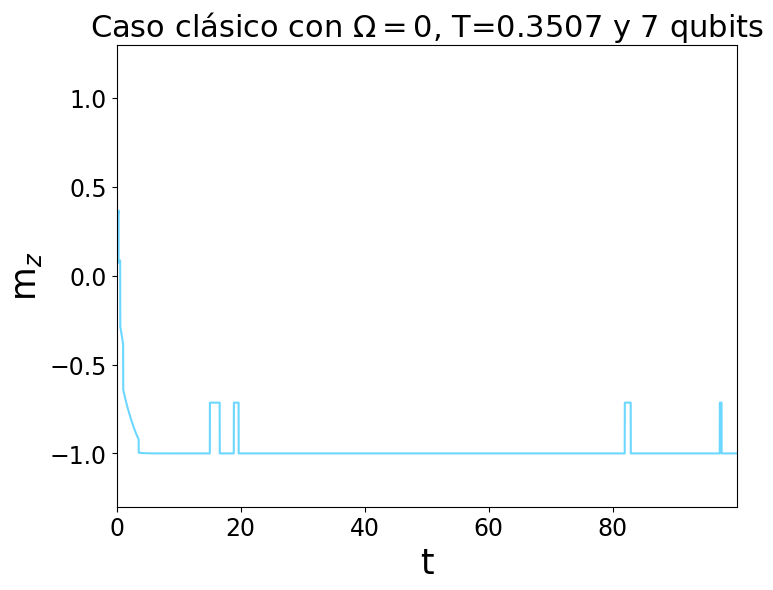

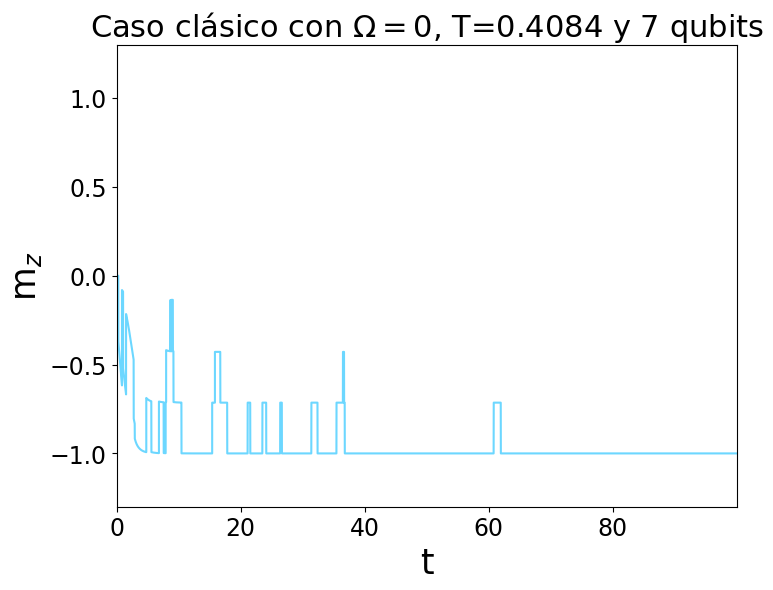

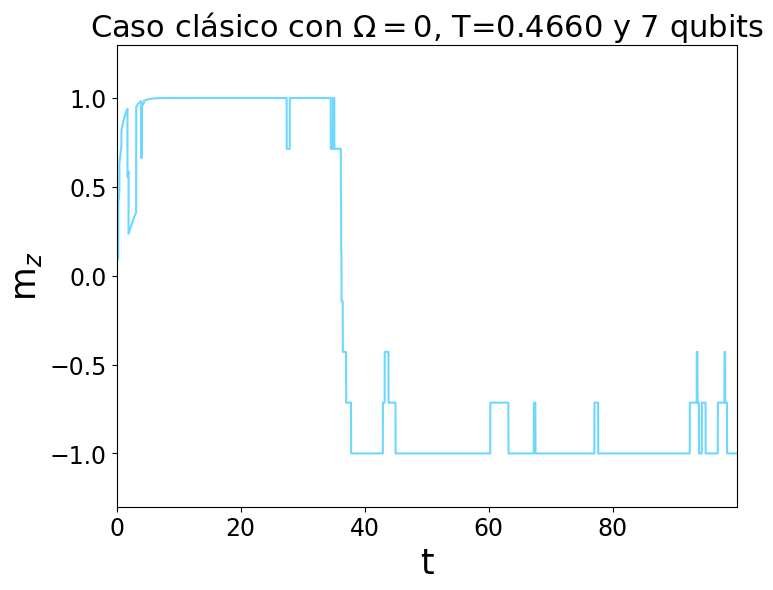

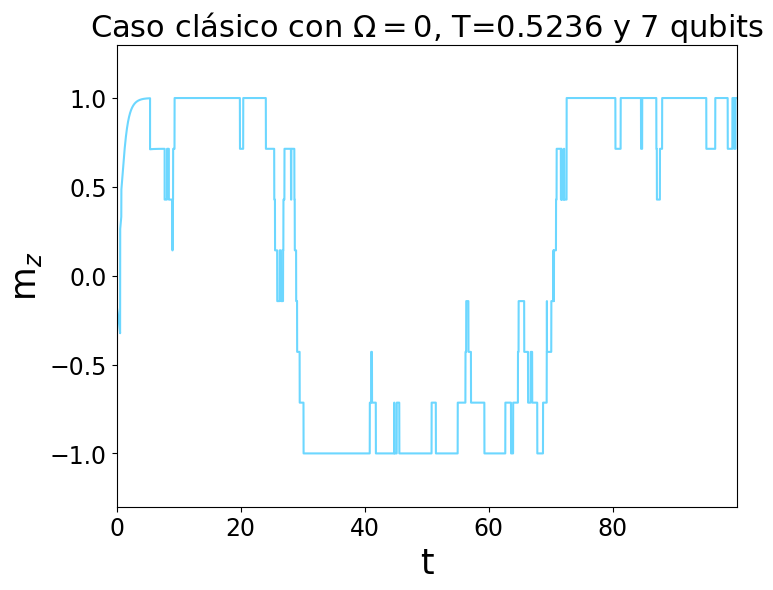

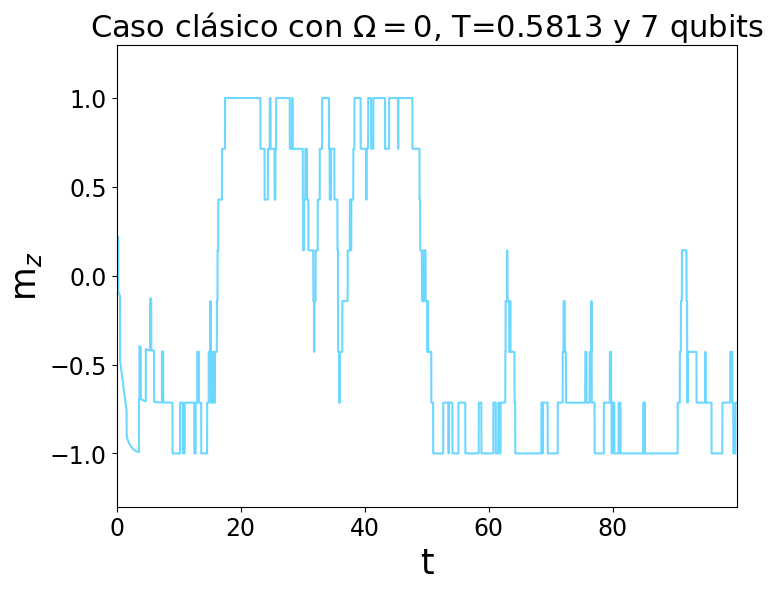

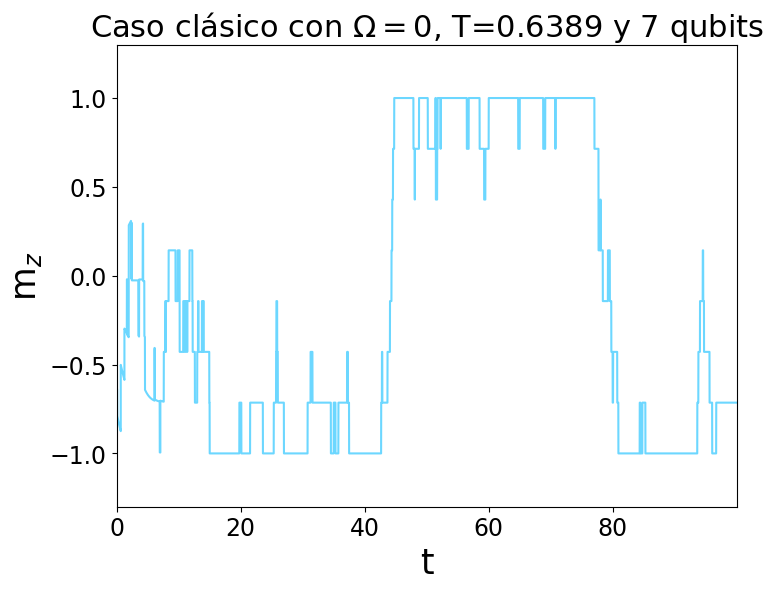

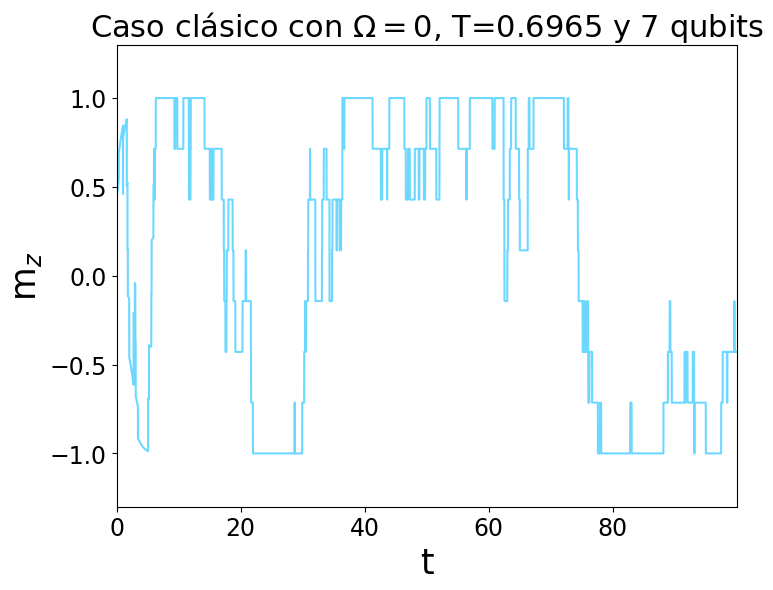

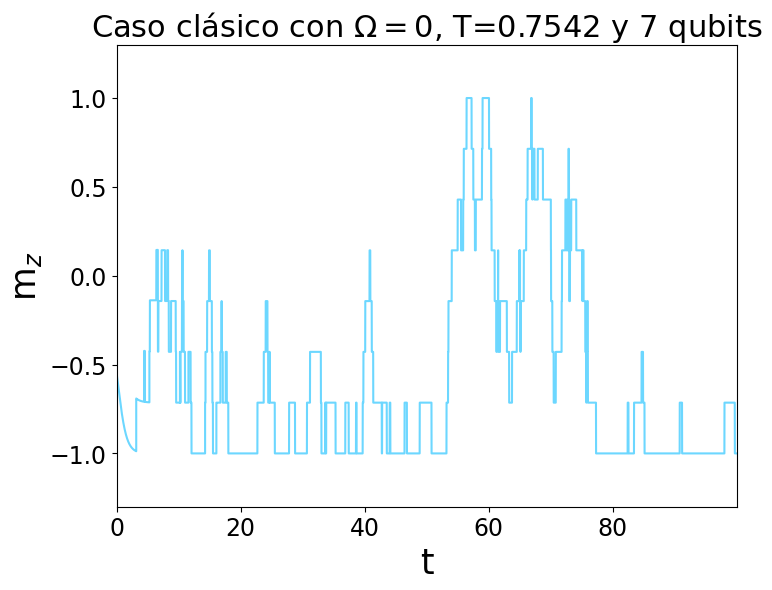

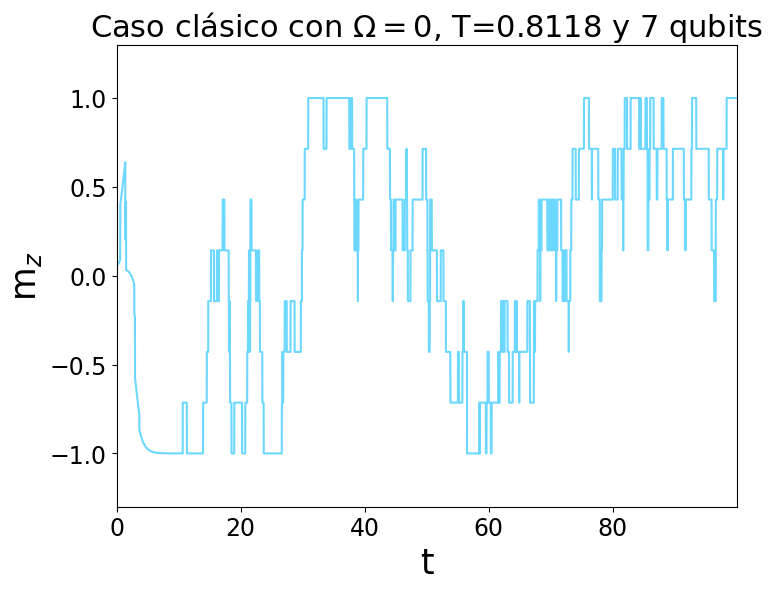

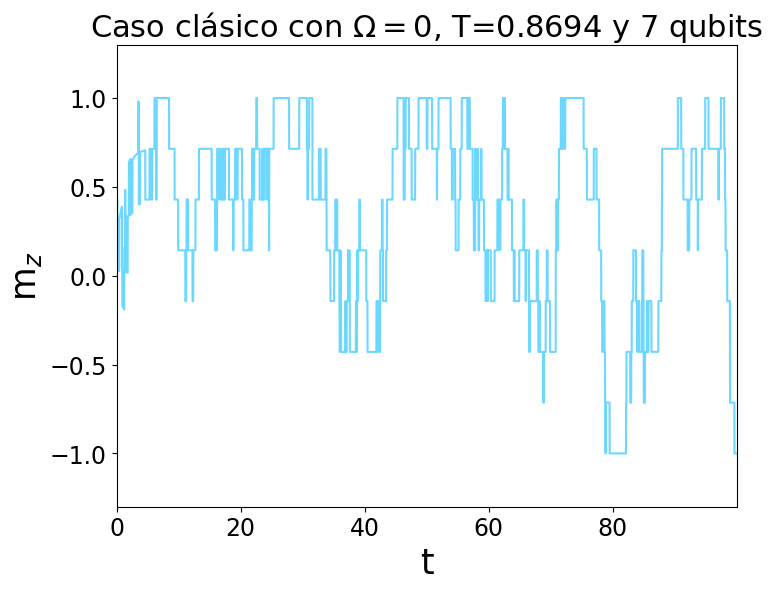

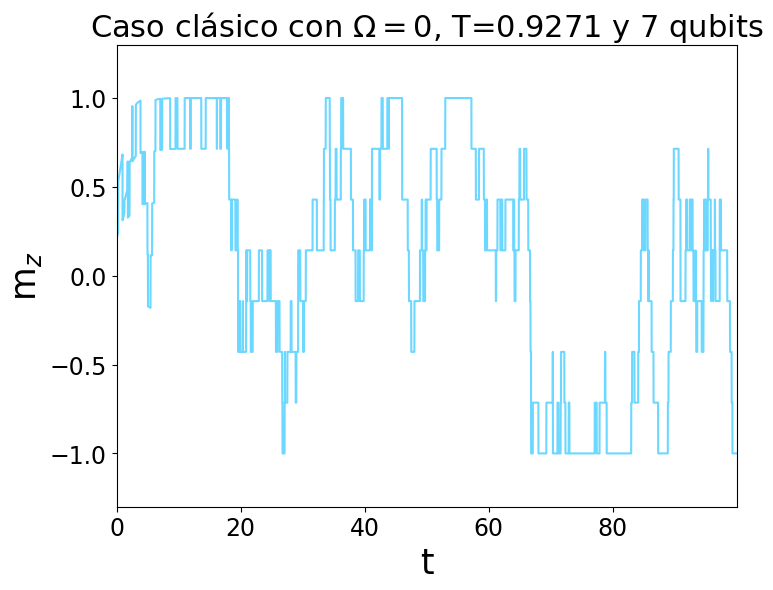

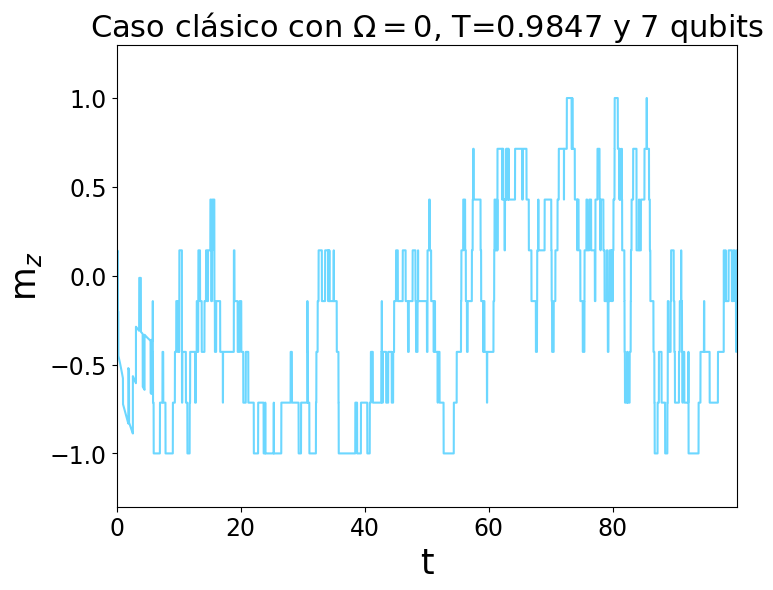

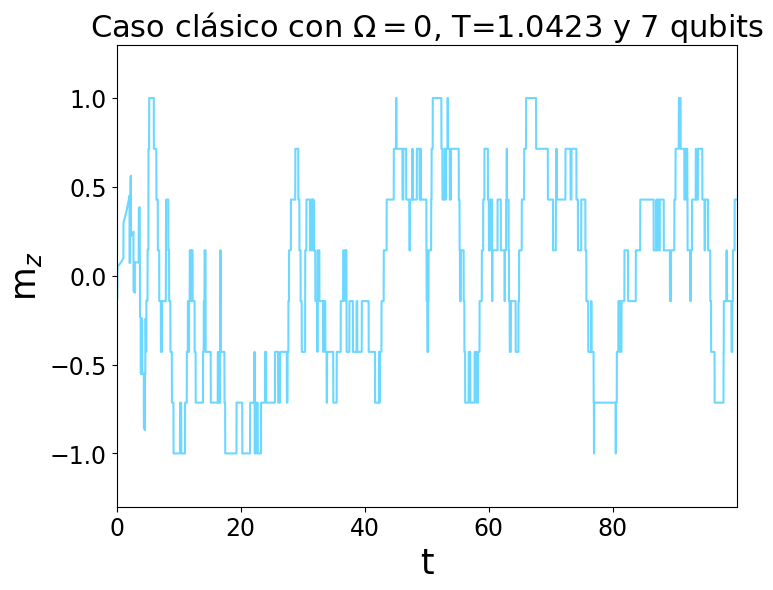

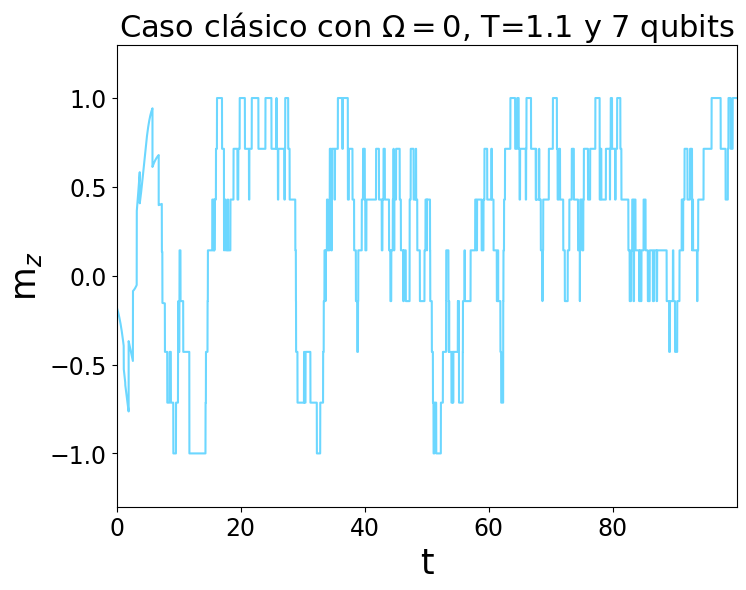

In [1]:
import numpy as np
import matplotlib.pyplot as plt

mz=np.genfromtxt("m_totalz_T.dat")

qbits=7

Omega=0

beta=1/np.linspace(0.005,1.1,20)

t=np.arange(0,4*mz.shape[0],4)/10000


for i in range(beta.size):
    plt.figure(i,figsize=(8,6))

    plt.title(r"Caso clásico con $\Omega=0$, T="+str(1/beta[i])[0:6]+" y 7 qubits",fontsize=22)
    plt.ylim(-1.3,1.3)
    plt.plot(t,mz[:,i],linewidth=1.5,color="#6cd7ff")
    
    plt.xlim(t[0],t[-1])
    plt.xlabel("t",fontsize=25)
    plt.ylabel(r"m$_{z}$",fontsize=25)
    plt.xticks(fontsize=17)
    #plt.legend(loc="upper right",fontsize=17)
    plt.yticks(fontsize=17)

    plt.savefig("limite_clasico_T_"+str(1/beta[i])[0:6]+"_"+str(qbits)+"_omega_"+str(Omega)+".png",format="png")

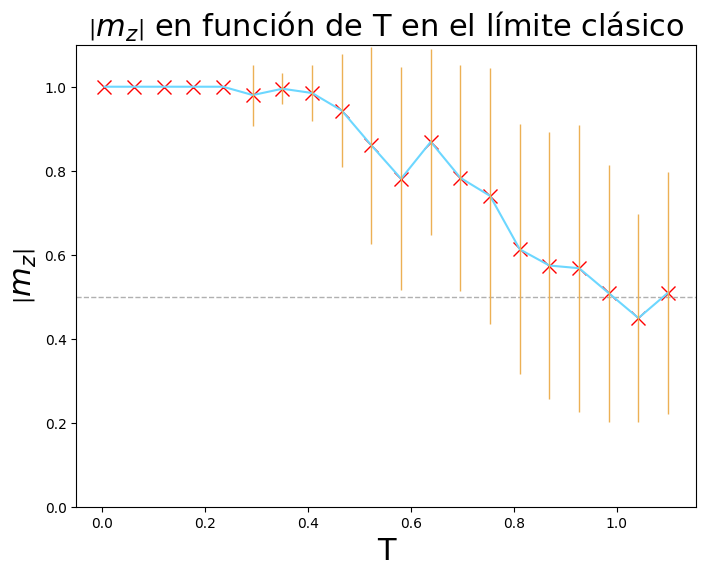

In [2]:
#Calculo las magnetizaciones promedio
ind=int(10*mz.shape[0]/40)

mz=np.genfromtxt("m_totalz_abs.dat")

mz_avg=np.zeros(mz.shape[1])
std=np.zeros(mz.shape[1])

for i in range(mz.shape[1]):
    mz_avg[i]+=np.mean(mz[int(ind):-1,i])
    std[i]+=np.std(mz[int(ind):-1,i])

plt.figure(2,figsize=(8,6))

plt.title(r"$\left |m_{z}\right|$ en función de T en el límite clásico",fontsize=22)

plt.ylabel(r"$\left |m_{z}\right|$",fontsize=22)
plt.xlabel(r"T",fontsize=22)
plt.ylim(0.0,1.1)

plt.axhline(0.5,linestyle="--",color="#b0b0b0",linewidth=1.0)

plt.plot(1/beta,np.abs(mz_avg),linewidth=1.5,color="#6cd7ff")
plt.errorbar(1/beta,np.abs(mz_avg),linewidth=0.0,color="r",yerr=std,ecolor="#ecb054",markersize=10.0,marker="x",elinewidth=1.0,barsabove=True)
plt.savefig("T_c_"+str(qbits)+"_omega_"+str(Omega)+".png",format="png")